In [ ]:
import gym
import numpy as np
import gym_donkeycar

# env = gym.make("donkey-warren-track-v0")
env = gym.make("donkey-generated-track-v0")

obs = env.reset()
try:
    for _ in range(100):
        # drive straight with small speed
        action = np.array([0.0, 0.5])  
        # execute the action
        obs, reward, done, info = env.step(action)
        print(info["cte"])
except KeyboardInterrupt:
    # You can kill the program using ctrl+c
    pass

    # Exit the scene
env.close()

In [1]:
import gym
import numpy as np
import gym_donkeycar
import time 

In [2]:
env = gym.make("donkey-generated-track-v0")

INFO:gym_donkeycar.core.client:connecting to localhost:9091 


starting DonkeyGym env
Setting default: start_delay 5.0
Setting default: max_cte 5.0
Setting default: frame_skip 2
Setting default: cam_resolution (120, 160, 3)
Setting default: log_level 20
Setting default: host localhost
Setting default: port 9091
loading scene generated_track


INFO:gym_donkeycar.envs.donkey_sim:on need car config
INFO:gym_donkeycar.envs.donkey_sim:sending car config.
INFO:gym_donkeycar.envs.donkey_sim:done sending car config.


In [3]:
obs = env.reset()

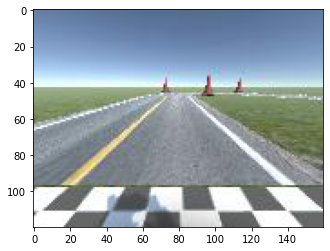

In [4]:
import matplotlib.pyplot as plt
plt.imshow(obs)

In [5]:
obs.shape

(120, 160, 3)

-33.10763
2.505777
-34.64117
3.611551


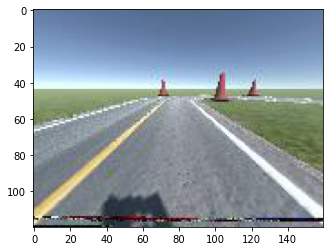

INFO:gym_donkeycar.envs.donkey_sim:on need car config
INFO:gym_donkeycar.envs.donkey_sim:sending car config.
INFO:gym_donkeycar.envs.donkey_sim:done sending car config.


In [14]:
action = np.array([0, 1])  
# execute the action
env.render()
obs, reward, done, info = env.step(action)
print(info["cte"])
print(info["speed"])

time.sleep(0.5)
action = np.array([0.0, 0.0])  
# execute the action
env.render()
obs, reward, done, info = env.step(action)
print(info["cte"])
print(info["speed"])
plt.imshow(obs)

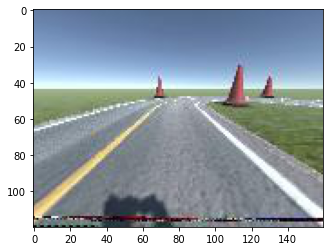

In [54]:
print(env.viewer.handler.cte)

0.02698135


In [52]:
action = np.array([0.0, 0.0])  
# execute the action
obs, reward, done, info = env.step(action)
print(info["cte"])
print(info["speed"])
print(done)

-13.25014
3.297553e-07
True


In [74]:
steer = 0
throttle = 1
brake = 0.0
message = {"msg_type": "control", "steering": steer.__str__(), "throttle": throttle.__str__(), "brake": "0.0"}

In [81]:
env.viewer.client.send_now(message)

In [15]:
env.close()